# Exercise: Clustering Algorithms with Scikit Learn
<img src="https://github.com/JonasZimmer1994/DataScienceSS20/blob/master/Notebooks/IMG/sk-logo.png?raw=1" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [ ]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [ ]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

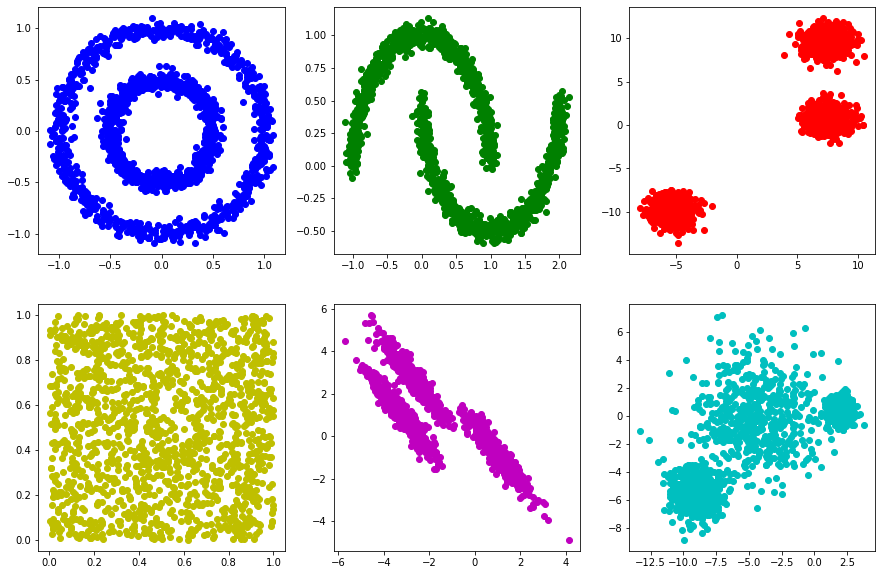

In [64]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.scatter(A[:,0], A[:,1], c="b")
plt.subplot(2,3,2)
plt.scatter(B[:,0], B[:,1], c="g")
plt.subplot(2,3,3)
plt.scatter(C[:,0], C[:,1], c="r")
plt.subplot(2,3,4)
plt.scatter(D[:,0], D[:,1], c="y")
plt.subplot(2,3,5)
plt.scatter(E[:,0], E[:,1], c="m")
plt.subplot(2,3,6)
plt.scatter(F[:,0], F[:,1], c="c")
plt.show()

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

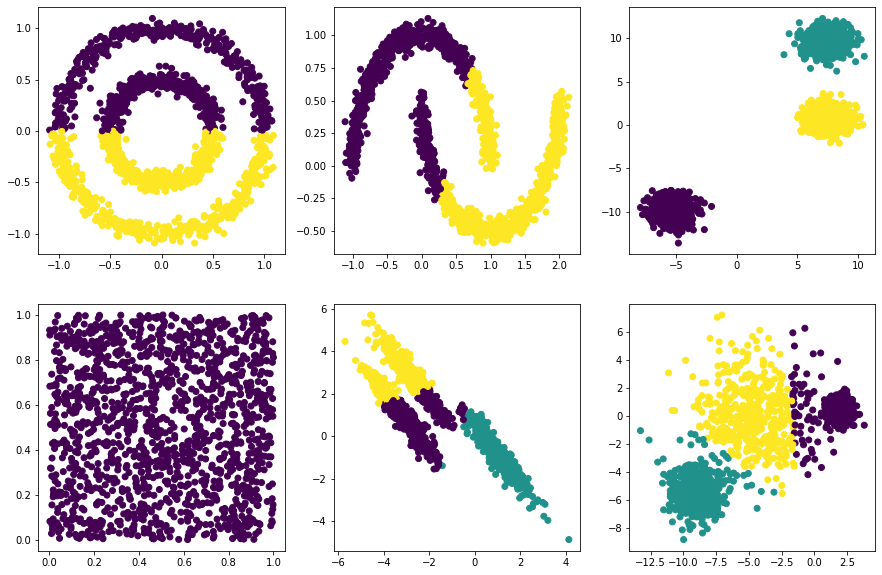

In [176]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(init='k-means++', n_clusters=2)
kmeans3 = KMeans(init='k-means++', n_clusters=3)
kmeans1 = KMeans(init='k-means++', n_clusters=1)

kmeansA = kmeans2.fit_predict(A)
kmeansB = kmeans2.fit_predict(B)
kmeansC = kmeans3.fit_predict(C)
kmeansD = kmeans1.fit_predict(D)
kmeansE = kmeans3.fit_predict(E)
kmeansF = kmeans3.fit_predict(F)

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.scatter(A[:,0], A[:,1], c=kmeansA)
plt.subplot(2,3,2)
plt.scatter(B[:,0], B[:,1], c=kmeansB)
plt.subplot(2,3,3)
plt.scatter(C[:,0], C[:,1], c=kmeansC)
plt.subplot(2,3,4)
plt.scatter(D[:,0], D[:,1], c=kmeansD)
plt.subplot(2,3,5)
plt.scatter(E[:,0], E[:,1], c=kmeansE)
plt.subplot(2,3,6)
plt.scatter(F[:,0], F[:,1], c=kmeansF)
plt.show()

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

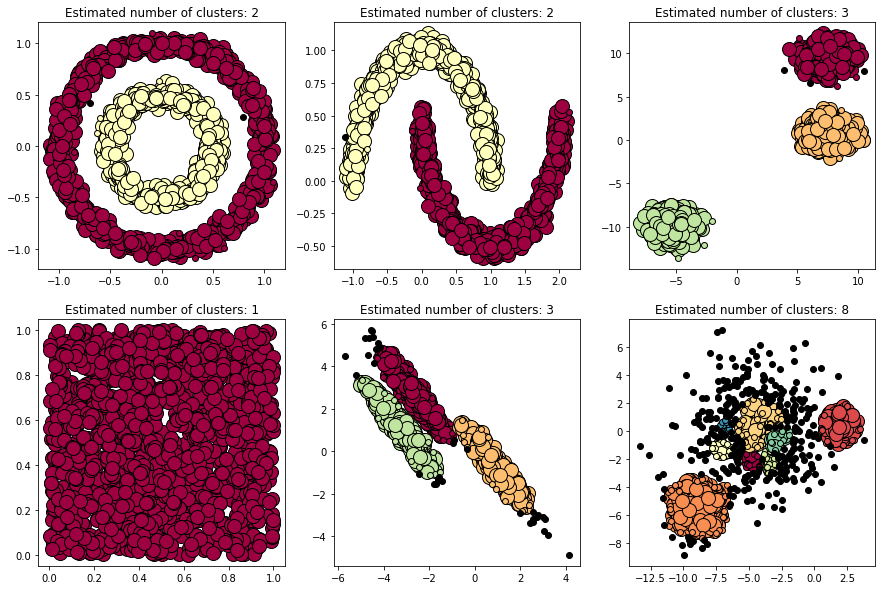

In [177]:
from sklearn.cluster import DBSCAN

dbscanA = DBSCAN(eps=0.1, min_samples=5).fit(A)
dbscanB = DBSCAN(eps=0.1, min_samples=5).fit(B)
dbscanC = DBSCAN(eps=1, min_samples=5).fit(C)
dbscanD = DBSCAN(eps=0.1, min_samples=5).fit(D)
dbscanE = DBSCAN(eps=0.3, min_samples=7).fit(E)
dbscanF = DBSCAN(eps=0.5, min_samples=10).fit(F)


core_samples_mask_A = np.zeros_like(dbscanA.labels_, dtype=bool)
core_samples_mask_B = np.zeros_like(dbscanB.labels_, dtype=bool)
core_samples_mask_C = np.zeros_like(dbscanC.labels_, dtype=bool)
core_samples_mask_D = np.zeros_like(dbscanD.labels_, dtype=bool)
core_samples_mask_E = np.zeros_like(dbscanE.labels_, dtype=bool)
core_samples_mask_F = np.zeros_like(dbscanF.labels_, dtype=bool)

core_samples_mask_A[dbscanA.core_sample_indices_] = True
core_samples_mask_B[dbscanB.core_sample_indices_] = True
core_samples_mask_C[dbscanC.core_sample_indices_] = True
core_samples_mask_D[dbscanD.core_sample_indices_] = True
core_samples_mask_E[dbscanE.core_sample_indices_] = True
core_samples_mask_F[dbscanF.core_sample_indices_] = True

labelsA = dbscanA.labels_
labelsB = dbscanB.labels_
labelsC = dbscanC.labels_
labelsD = dbscanD.labels_
labelsE = dbscanE.labels_
labelsF = dbscanF.labels_

n_clusters_A = len(set(labelsA)) - (1 if -1 in labelsA else 0)
n_clusters_B = len(set(labelsB)) - (1 if -1 in labelsB else 0)
n_clusters_C = len(set(labelsC)) - (1 if -1 in labelsC else 0)
n_clusters_D = len(set(labelsD)) - (1 if -1 in labelsD else 0)
n_clusters_E = len(set(labelsE)) - (1 if -1 in labelsE else 0)
n_clusters_F = len(set(labelsF)) - (1 if -1 in labelsF else 0)

unique_labels_A = set(labelsA)
unique_labels_B = set(labelsB)
unique_labels_C = set(labelsC)
unique_labels_D = set(labelsD)
unique_labels_E = set(labelsE)
unique_labels_F = set(labelsF)

colors_A = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_A))]

colors_B = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_B))]

colors_C = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_C))]

colors_D = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_D))]

colors_E = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_E))]

colors_F = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_F))]


plt.figure(figsize=(15,10))

for k, col in zip(unique_labels_A, colors_A):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_A = (labelsA == k)

    plt.subplot(2,3,1)
    xy = A[class_member_mask_A & core_samples_mask_A]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_A)
    plt.subplot(2,3,1)
    xy = A[class_member_mask_A & ~core_samples_mask_A]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


for k, col in zip(unique_labels_B, colors_B):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_B = (labelsB == k)

    plt.subplot(2,3,2)
    xy = B[class_member_mask_B & core_samples_mask_B]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_B)

    plt.subplot(2,3,2)
    xy = B[class_member_mask_B & ~core_samples_mask_B]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    

for k, col in zip(unique_labels_C, colors_C):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_C = (labelsC == k)

    plt.subplot(2,3,3)
    xy = C[class_member_mask_C & core_samples_mask_C]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_C)

    plt.subplot(2,3,3)
    xy = C[class_member_mask_C & ~core_samples_mask_C]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)    
    

for k, col in zip(unique_labels_D, colors_D):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_D = (labelsD == k)

    plt.subplot(2,3,4)
    xy = D[class_member_mask_D & core_samples_mask_D]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_D)

    plt.subplot(2,3,4)
    xy = D[class_member_mask_D & ~core_samples_mask_D]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


for k, col in zip(unique_labels_E, colors_E):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_E = (labelsE == k)

    plt.subplot(2,3,5)
    xy = E[class_member_mask_E & core_samples_mask_E]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_E)

    plt.subplot(2,3,5)
    xy = E[class_member_mask_E & ~core_samples_mask_E]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6) 


for k, col in zip(unique_labels_F, colors_F):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_F = (labelsF == k)

    plt.subplot(2,3,6)
    xy = F[class_member_mask_F & core_samples_mask_F]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_F)

    plt.subplot(2,3,6)
    xy = F[class_member_mask_F & ~core_samples_mask_F]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)          


plt.show()          
